In [2]:
import sys

sys.path.append("..")

from importlib import reload
import utils.log_viewer

reload(utils.log_viewer)
from utils.log_viewer import plot_experiment

# %matplotlib widget

# Experiments performed:

- 20240312_1143: stationary @ (2.5,2) with UDP
- 20240312_1150:
- 20240312_1154:
- 20240312_1200:
- 20240312_1205:
- 20240312_1210:
- 20240312_1225:
- 20240312_1247:
- 20240312_1257:
- 20240312_1306:
- 20240312_1310:
- 20240312_1312:
- 20240312_1315:
- 20240312_1316:


## 20240312_1143

- stationary @ (2.5,2) with UDP
- Somewhat stable, but not very stable
- Throughput between 1 and 3 Mbit/s


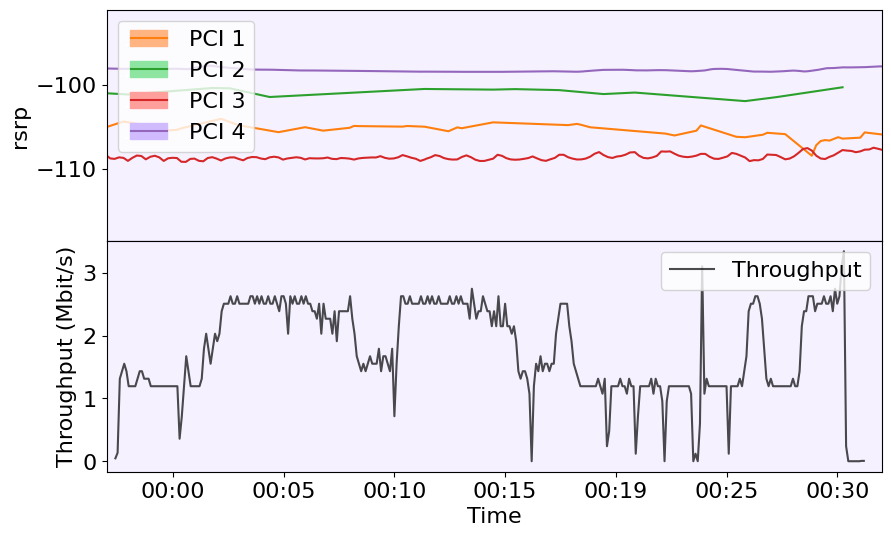

In [12]:
experiment = "20240312_1143"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    from_time="11:47:37",
    to_time="11:48:12",
    title="",  # f"{experiment}",
    reset_ticks=True,
    save_path="../figs/4stationary_udp.png",
)

## 20240312_1150 (failed)

- stationary @ (2.5,2) with TCP
- Experiment failed due to tcp not connecting


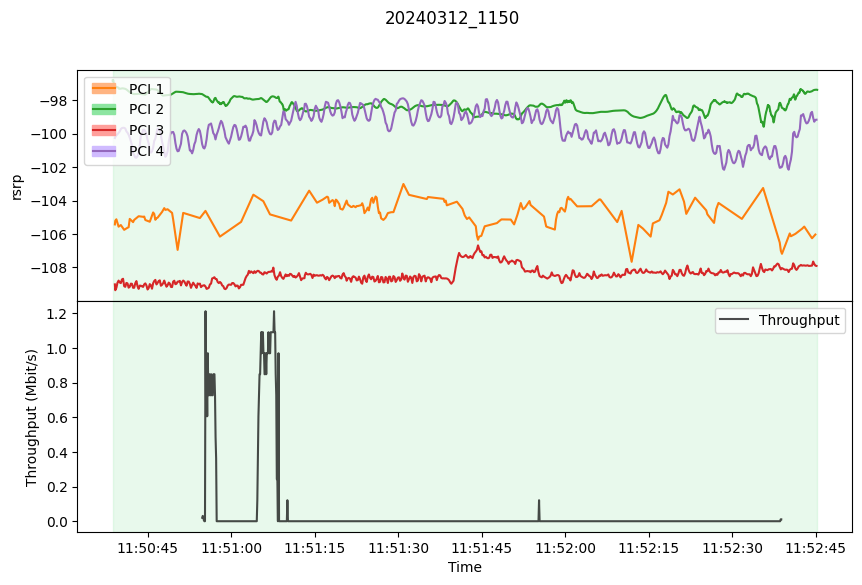

'\nStationary, TCP, Failed\n'

In [24]:
experiment = "20240312_1150"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    # from_time="11:47:37",
    # to_time="11:48:12",
    title=f"{experiment}",
)

"""
Stationary, TCP, Failed
"""

## 20240312_1153

- stationary @ (2.5,2) with TCP
- connection much more stable in selected time frames


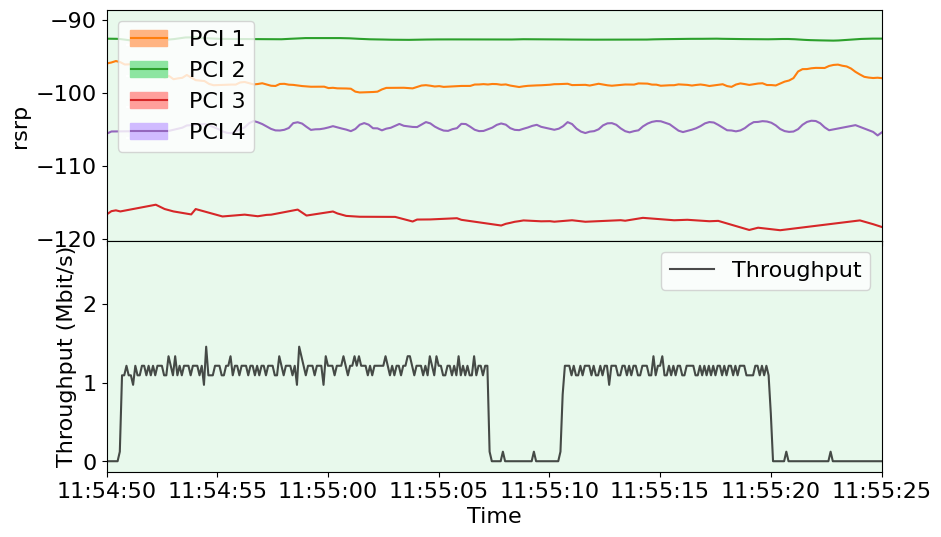

In [18]:
experiment = "20240312_1153"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    from_time="11:54:50",
    to_time="11:55:25",
    title="",  # f"{experiment}",
    # reset_ticks=True,
    # save_path="../figs/4stationary_tcp.png",
)

## 20240312_1159

- stationary @ (2.5,2) with TCP
- we reduce buffer size to 64K from 128K to see if it has any effect on the connection
- terrible connection


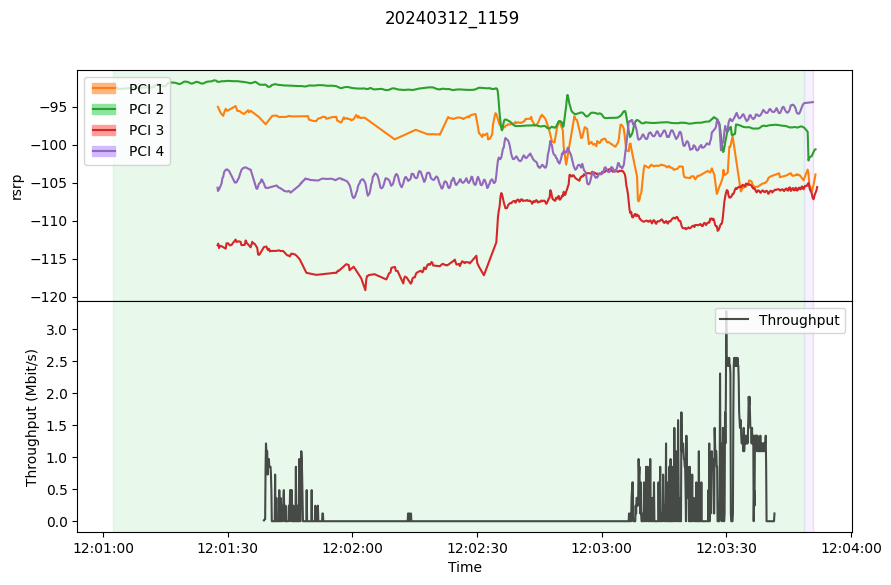

'\nStationary, TCP, buff 64K\n'

In [28]:
experiment = "20240312_1159"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    # from_time="11:47:37",
    # to_time="11:48:12",
    title=f"{experiment}",
)

## 20240312_1205 & 20240312_1209 (Failed)

- stationary @ (2.5,2) with TCP (64K buffer)
- failed - no connection


## 20240312_1225

- very long tcp experiment


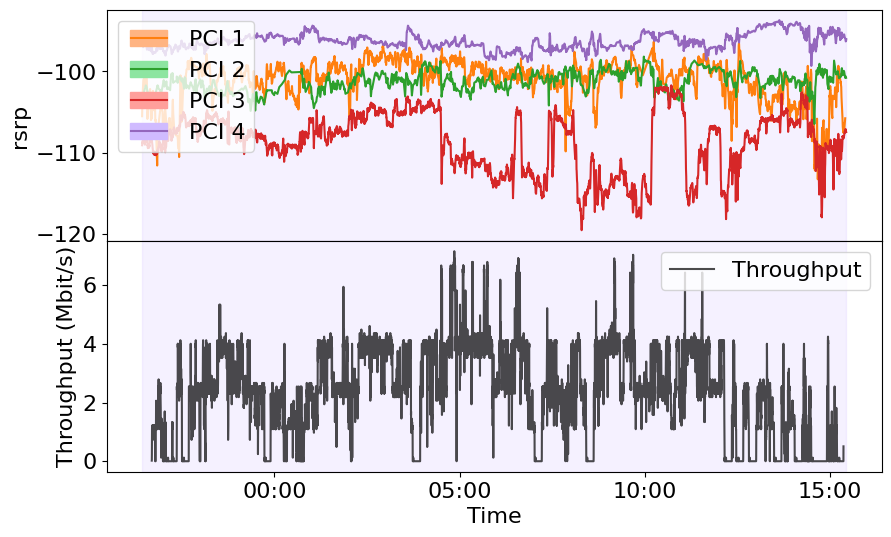

In [15]:
experiment = "20240312_1225"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    # from_time="11:47:37",
    # to_time="11:48:12",
    title="",  # f"{experiment}",
    reset_ticks=True,
    save_path="../figs/4stationary_tcp_long.png",
)

## 20240312_1246 (failed)

- walk back and forth between (2.5,2) and (6,3) with TCP
- UE unplugged halfway through
- no idea why throughput is up an end, maybe desync occured


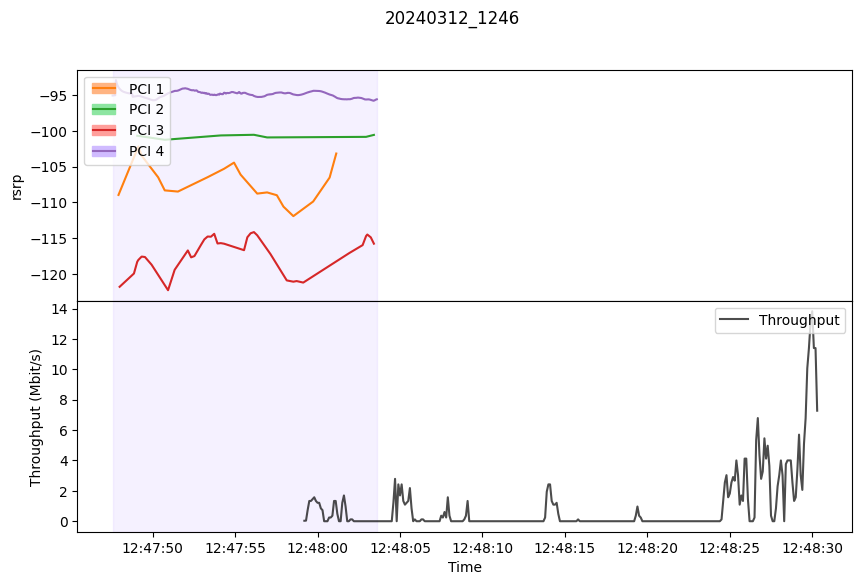

In [37]:
experiment = "20240312_1246"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    # from_time="11:47:37",
    # to_time="11:48:12",
    title=f"{experiment}",
)

## 20240312_1256

- walked back and forth between (2.5,2) and (6,3) with TCP multiple times
- TODO: check corrolation between PCI and throughput


Handover from 1 to 2 @ 2024-03-12 13:00:23.532467
Handover from 2 to 1 @ 2024-03-12 13:00:33.010652
Handover from 1 to 2 @ 2024-03-12 13:00:34.653464
Handover from 2 to 3 @ 2024-03-12 13:00:34.692530
Handover from 3 to 1 @ 2024-03-12 13:00:35.330687
Handover from 1 to 4 @ 2024-03-12 13:00:48.228038
Handover from 4 to 1 @ 2024-03-12 13:01:37.606914
Handover from 1 to 4 @ 2024-03-12 13:01:54.209440
Handover from 4 to 2 @ 2024-03-12 13:02:39.995524
Handover from 2 to 1 @ 2024-03-12 13:02:41.450488


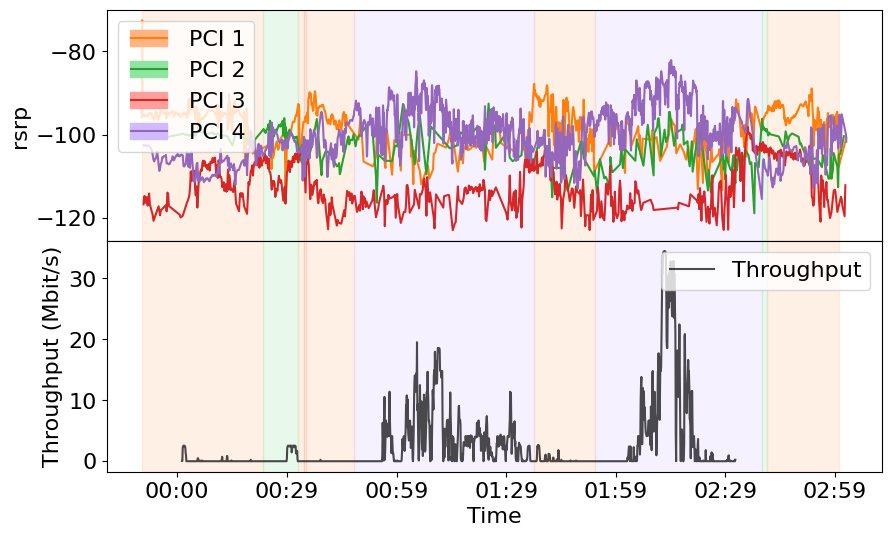

== Total Corr ==
0.5529675574739759

== Per-pci corr ==
pci      
1.0  rsrp    0.197505
2.0  rsrp   -0.412226
4.0  rsrp    0.619976
Name: length, dtype: float64

== Average throughput per PCI ==
pci
1.0    0.116330
2.0    0.496145
4.0    4.561782
Name: length, dtype: float64


In [53]:
experiment = "20240312_1256"

import utils.log_viewer

reload(utils.log_viewer)
from utils.log_viewer import plot_experiment

out = plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    print_ho=True,
    smooth_rsrp_ms=10,
    # from_time="13:00:33",
    # to_time="13:00:35",
    title=f"",
    reset_ticks=True,
    # save_path="../figs/4NEW1.png",
    print_stats=True,
)

In [52]:
log_data = out["log_data"].copy()
throughput = out["throughput"].copy()
import scipy.stats as stats

# add timestamp column as index for log_data
# log_data["timestamp"] = log_data["timestamp"].astype("datetime64[ns]")
log_data = log_data.set_index("timestamp")

log_data_serving = log_data[log_data["measurement_type"] == "serving"][["rsrp"]]
log_data_serving = log_data_serving.resample("1s").mean()

rsrp_corr_data = log_data_serving.merge(
    throughput[throughput["length"] > 0], left_index=True, right_index=True, how="inner"
)
rsrp_corr = rsrp_corr_data.corr().loc["rsrp", "length"]
print("Total corr", rsrp_corr)
# rsrp_corr_data
# Resample to 1 second
# log_data = log_data.resample("1S").mean()
# throughput = throughput.resample("1S").mean()

log_data_serving = log_data[log_data["measurement_type"] == "serving"][["pci", "rsrp"]]
log_data_serving = log_data_serving.resample("1s").apply(
    {"pci": lambda x: stats.mode(x)[0], "rsrp": "mean"}
)

pci_corr_data = log_data_serving.merge(
    throughput, left_index=True, right_index=True, how="inner"
)
# pci_corr_data
pci_corr = pci_corr_data.groupby(
    "pci"
).corr()  # .loc["rsrp", "length"]#.loc["pci", "length"]
pci_corr = pci_corr.loc[(slice(None), "rsrp"), "length"]
print("Per-pci corr", pci_corr)

# Average throughput per PCI
pci_throughput = pci_corr_data.groupby("pci").mean()["length"]
print("Average throughput per PCI")
pci_throughput

Total corr 0.5529675574739759
Per-pci corr pci      
1.0  rsrp    0.197505
2.0  rsrp   -0.412226
4.0  rsrp    0.619976
Name: length, dtype: float64
Average throughput per PCI


pci
1.0    0.116330
2.0    0.496145
4.0    4.561782
Name: length, dtype: float64

In [20]:
log_data

,measurement_type,pci,rsrp
timestamp,,,
2024-03-12 12:59:50.288334,serving,1,-95.74
2024-03-12 12:59:50.309337,serving,1,-95.75
2024-03-12 12:59:50.329349,serving,1,-95.71
2024-03-12 12:59:50.350276,serving,1,-95.77
2024-03-12 12:59:50.370312,serving,1,-94.88
...,...,...,...
2024-03-12 13:03:02.597238,neighbour,3,-119.51
2024-03-12 13:03:02.797181,neighbour,3,-112.10
2024-03-12 13:03:02.997266,neighbour,4,-100.03


## 20240312_1305

- rotate 360 degrees at (2.5,2) with UDP


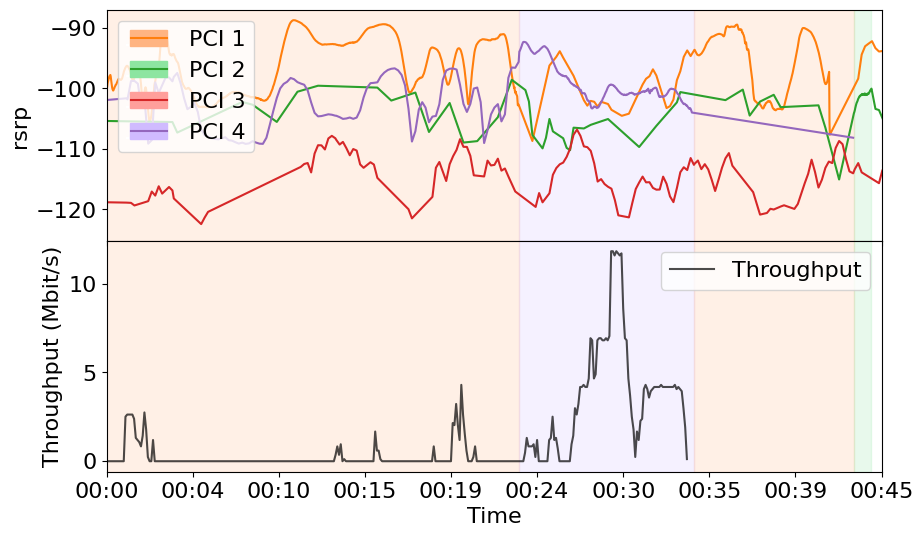

In [16]:
experiment = "20240312_1305"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    smooth_rsrp_ms=10,
    from_time="13:07:30",
    to_time="13:08:15",
    title="",  # f"{experiment}",
    reset_ticks=True,
    save_path="../figs/4rotate_tcp_failed.png",
)

## 20240312_1309

- rotate 360 degrees at (2.5,2) with UDP
- weirdly broken


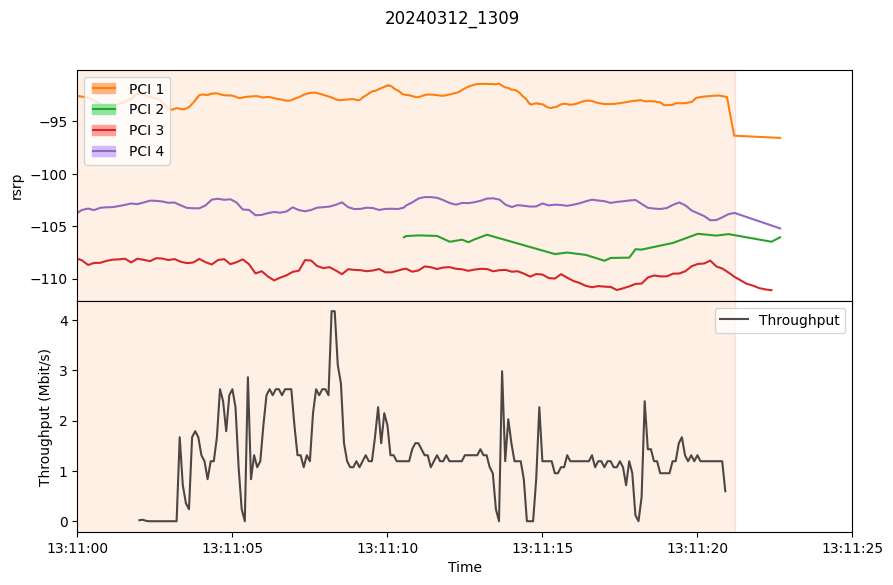

In [4]:
experiment = "20240312_1309"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    from_time="13:11:00",
    to_time="13:11:25",
    title=f"{experiment}",
)

## 20240312_1312

- rotate 360 degrees at (2.5,2) with TCP


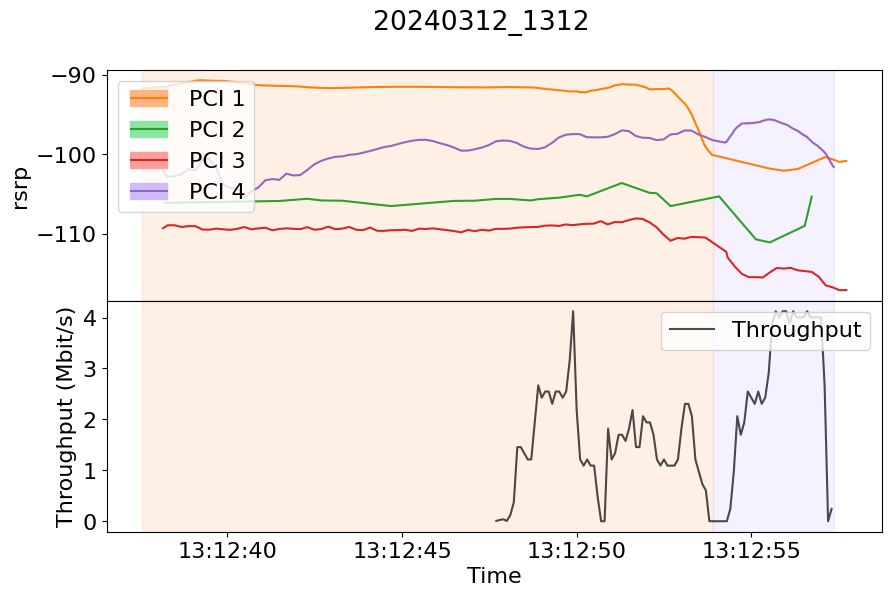

In [4]:
experiment = "20240312_1312"

plot_experiment(
    f"data/logs/{experiment}.log",
    f"data/iperf/{experiment}.csv",
    # from_time="13:12:47",
    # to_time="11:48:12",
    title=f"{experiment}",
)

## 20240312_1315 (failed)

- rotate 360 degrees at (2.5,2) with TCP
